# Wk6_Exercises_tutorial (with solutions)

Before you start, first import the pandas, NumPy, matplotlib, seaborn, SciPy and statsmodels libraries, for example as follows:
```python
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
```

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

__Q1:__ Use statsmodels to perform a __regression explanatory modeling__ analysis on the 'tips' dataset. More specifically, perform the following operations:  
- Import the 'tips' dataset, and assign it to a variable ('df_tips').
- Regress the 'tip' variable on all other variables.
- Add the column with the standardized residuals to df_tips.
- Display a Q-Q plot of the standardized residuals.
- Display a histogram of the standardized residuals.
- Display a fitted values - standardized residuals plot.
- Use the regression model to predict (based on the following input values: {'total_bill': 30, 'size': 4, 'sex': 'Male', 'smoker': 'No', 'day': 'Sat', 'time': 'Dinner'}).

In [2]:
# Import the 'tips' dataset

df_tips = sns.load_dataset('tips')

In [3]:
# Regression of the 'tip' variable on all other variables

regr1 = smf.ols(formula='tip ~ total_bill + size + sex + smoker + day + time', data=df_tips).fit()
print(regr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.20e-28
Time:                        07:46:24   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.

In [4]:
# Add the column with the standardized residuals to df_tips

df_tips['std_res_regr1'] = stats.zscore(regr1.resid)

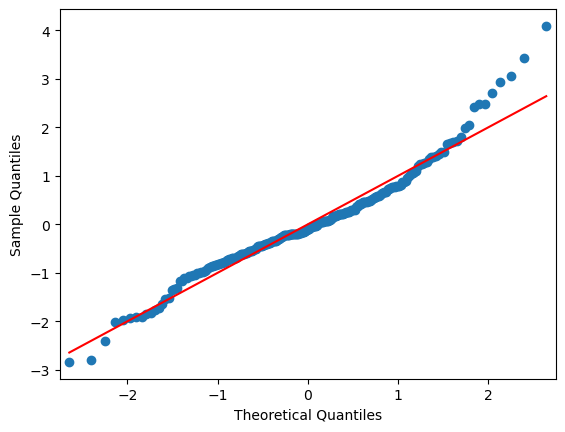

In [5]:
# Q-Q plot of the standardized residuals

statsmodels.graphics.gofplots.qqplot(df_tips['std_res_regr1'], line='r')
plt.show()

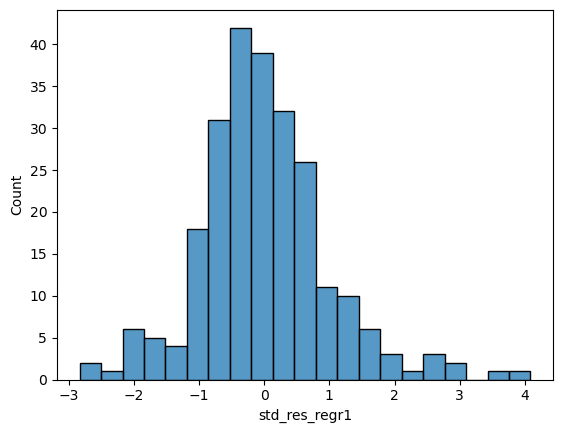

In [6]:
# Histogram of the standardized residuals

sns.histplot(df_tips['std_res_regr1'])
plt.show()

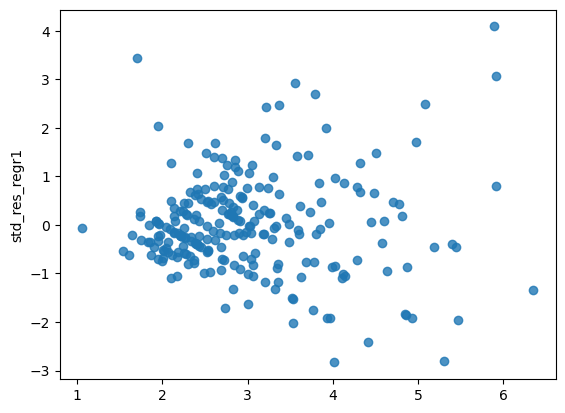

In [7]:
# Fitted values - standardized residuals plot

sns.regplot(x=regr1.fittedvalues, y=df_tips['std_res_regr1'], fit_reg=False)
plt.show()

In [8]:
# Use the regression model to predict

regr1.predict({'total_bill': 30, 'size': 4, 'sex': 'Male', 'smoker': 'No', 'day': 'Sat', 'time': 'Dinner'}).round(2)

0    4.19
dtype: float64

__Q2:__ Use Scikit-learn to perform a __regression predictive modeling__ analysis on the 'tips' dataset. More specifically, perform the following operations:  
- Use the `get_dummies()` method to convert the categorical variables into dummy variables.
- Perform a simple train-test split.
- Import the LinearRegression class.
- Instantiate the class and set no parameters.
- Build the model by calling the `fit()` method.
- Predict the labels in the test set.
- Evaluate the model using regression evaluation metrics.
- Use the regression model to predict (based on the following NumPy array with input values: [30, 4, 1, 0, 0, 1, 0, 1]).

In [9]:
# Convert categorical variables into dummy variables

df_tips_dummy = pd.get_dummies(df_tips[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']], drop_first=True)
df_tips_dummy.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [10]:
# Simple train-test split

from sklearn.model_selection import train_test_split

X = df_tips_dummy.values
y = df_tips.values[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print("Train features shape: ", X_train.shape)
print("Test features shape: ", X_test.shape)

Train features shape:  (183, 8)
Test features shape:  (61, 8)


In [11]:
# Import the Estimator class(es)

from sklearn.linear_model import LinearRegression

In [12]:
# Instantiate the class and set the parameters

regr2 = LinearRegression()

In [13]:
# Build the model by calling the fit method

regr2.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the labels in the test set

y_pred = regr2.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [4.96107462 3.0549013  4.68673557 1.92296206 3.05819284 4.25048225
 2.95362677 2.52043652 3.91544574 2.75030187 2.02845434 2.75339661
 2.58626339 2.28940172 2.41351234 3.28281777 1.95957917 2.79688584
 5.67071419 2.56739932 3.81974234 2.41567842 2.04200195 3.10838661
 2.14536966 2.75877133 5.55590439 4.92044918 2.58108315 2.18058623
 4.14644355 2.0606569  3.96958425 2.7452943  3.33194871 1.76897546
 2.36292743 3.95551421 3.93662599 2.3355381  2.95131264 2.34616117
 2.84404312 2.54679262 5.44300793 3.27800153 1.91200828 3.3655441
 1.70985051 5.08648586 2.59080923 2.12800545 2.06022163 1.92087889
 2.88100064 2.12939584 4.96376821 4.76745921 2.12812368 3.32627001
 1.95997032]


In [15]:
# Evaluate the model using evaluation metrics

from sklearn import metrics
import math

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
print("mae:", round(mae, 2), "/ mse:", round(mse, 2), "/ rmse:", round(rmse, 2), "/ r2:", round(r2, 2))

mae: 0.64 / mse: 0.82 / rmse: 0.91 / r2: 0.44


In [16]:
# Use the regression model to predict

X_new = np.array([[30, 4, 1, 0, 0, 1, 0, 1]])
print("X_New.shape:", X_new.shape)
prediction = round(float(regr2.predict(X_new)), 2)
print("Prediction:", prediction)

X_New.shape: (1, 8)
Prediction: 4.24


## Some remarks about Assignment 1

In [17]:
# Create the initial DataFrame

df1 = pd.DataFrame({'Items': ['Net sales', 'Cost of goods sold', 'SG&A expenses', 'Operating income', 'Income taxes', 'Net income'],
                    2018: [485000, np.nan, np.nan, np.nan, np.nan, np.nan],
                    2019: [490000, np.nan, np.nan, np.nan, np.nan, np.nan],
                    2020: [510000, np.nan, np.nan, np.nan, np.nan, np.nan]}).set_index('Items')
df1.rename_axis(None, inplace=True)
df1

,2018,2019,2020
Net sales,485000.0,490000.0,510000.0
Cost of goods sold,NaN,NaN,NaN
SG&A expenses,NaN,NaN,NaN
Operating income,NaN,NaN,NaN
Income taxes,NaN,NaN,NaN
Net income,NaN,NaN,NaN


In [18]:
# Import the data

df2 = pd.read_excel('data/expenses.xlsx', sheet_name='Sheet1', header=0, index_col=0, skiprows=2)
df2

,2018,2019,2020
Cost of goods sold,335000,350000,360000
SG&A expenses,95000,97500,100000
Income taxes,17500,13500,16000


In [19]:
# Calculate (and fill in) the values (1)

df1.loc['Cost of goods sold', :] = df2.loc['Cost of goods sold', :]
df1.loc['SG&A expenses', :] = df2.loc['SG&A expenses', :]
df1.loc['Income taxes', :] = df2.loc['Income taxes', :]
df1

,2018,2019,2020
Net sales,485000.0,490000.0,510000.0
Cost of goods sold,335000.0,350000.0,360000.0
SG&A expenses,95000.0,97500.0,100000.0
Operating income,NaN,NaN,NaN
Income taxes,17500.0,13500.0,16000.0
Net income,NaN,NaN,NaN


In [20]:
# Calculate (and fill in) the values (2)

df1.loc['Operating income', :] = (df1.loc['Net sales'] - df1.loc['Cost of goods sold'] - df1.loc['SG&A expenses'])
df1.loc['Net income', :] = (df1.loc['Operating income'] - df1.loc['Income taxes'])
df1

,2018,2019,2020
Net sales,485000.0,490000.0,510000.0
Cost of goods sold,335000.0,350000.0,360000.0
SG&A expenses,95000.0,97500.0,100000.0
Operating income,55000.0,42500.0,50000.0
Income taxes,17500.0,13500.0,16000.0
Net income,37500.0,29000.0,34000.0


In [21]:
# Calculate (and fill in) the values (3)

df1['Total 2018-2020'] = df1.iloc[:, :3].sum(axis=1)
df1

,2018,2019,2020,Total 2018-2020
Net sales,485000.0,490000.0,510000.0,1485000.0
Cost of goods sold,335000.0,350000.0,360000.0,1045000.0
SG&A expenses,95000.0,97500.0,100000.0,292500.0
Operating income,55000.0,42500.0,50000.0,147500.0
Income taxes,17500.0,13500.0,16000.0,47000.0
Net income,37500.0,29000.0,34000.0,100500.0


## Some remarks about Assignment 2

Some important considerations concerning the estimation of earnings management models, such as those used in this assignment:
- With or without an intercept?
- Single time-series, cross-sectional/industry or cross-sectional/sample?
- Income-increasing EM (positive residuals) vs. Income-decreasing EM (negative residuals)?
- Signed vs. Unsigned (absolute values)?

The formula for curtailment of discretionary SG&A costs is:

$$SG\&A_{it}/Total Assets_{it-1} = {\beta}_{1} + {\beta}_{2}(1/Total Assets_{it-1}) + {\beta}_{3}(Sales_{it-1}/Total Assets_{it-1}) + {\epsilon}_{it}$$

The abnormal level of discretionary SG&A costs is measured as __(the inverse of)__ the estimated __residual__ from this equation (i.e., *not* the standardized residual).

Similarly, the formula for curtailment of discretionary R&D costs is:

$$R\&D_{it}/Total Assets_{it-1} = {\beta}_{1} + {\beta}_{2}(1/Total Assets_{it-1}) + {\beta}_{3}(Sales_{it-1}/Total Assets_{it-1}) + {\epsilon}_{it}$$

The abnormal level of discretionary R&D costs is measured as __(the inverse of)__ the estimated __residual__ from this equation (i.e., *not* the standardized residual).

## Some remarks about assignment 3

No remarks. Relatively straightforward assignment.